Probability for 0 successes =  0.000000 ... Cumulative Probability =  0.000000
Probability for 1 successes =  0.000000 ... Cumulative Probability =  0.000000
Probability for 2 successes =  0.000000 ... Cumulative Probability =  0.000000
Probability for 3 successes =  0.000000 ... Cumulative Probability =  0.000000
Probability for 4 successes =  0.000000 ... Cumulative Probability =  0.000000
Probability for 5 successes =  0.000000 ... Cumulative Probability =  0.000000
Probability for 6 successes =  0.000000 ... Cumulative Probability =  0.000000
Probability for 7 successes =  0.000000 ... Cumulative Probability =  0.000000
Probability for 8 successes =  0.000000 ... Cumulative Probability =  0.000000
Probability for 9 successes =  0.000000 ... Cumulative Probability =  0.000000
Probability for 10 successes =  0.000000 ... Cumulative Probability =  0.000000
Probability for 11 successes =  0.000000 ... Cumulative Probability =  0.000000
Probability for 12 successes =  0.000000 ... Cumul

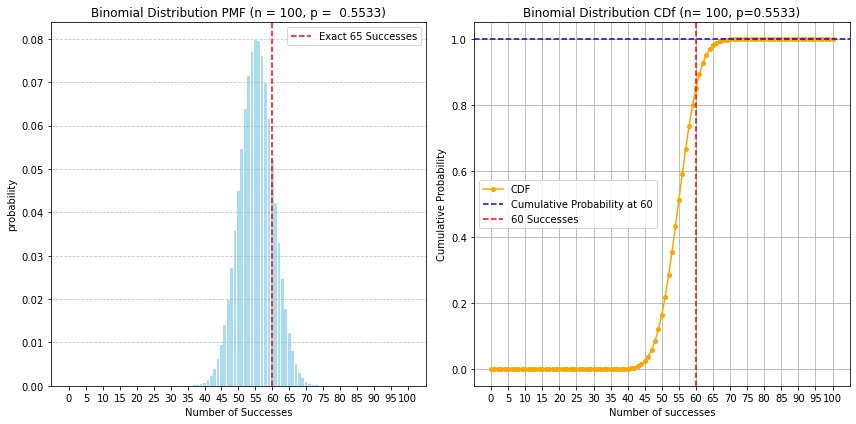

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import binom

tips_df = pd.read_csv(r'D:\workspace\DataAnalytics\Day2Pandas\tips (1).csv')

# Binomial outcome: Success if (tip/ total_bill ) >0.15 , othrwise failure

def classify_tip(row):
    total_bill = row['total_bill']
    tip = row['tip']
    if (tip/ total_bill) > 0.15:
        return 1       # success
    else:
        return 0           # failure
    
# apply the function to create the binary column 
tips_df['tip_binary'] = tips_df.apply(classify_tip, axis= 1)

# Total number of trials (total observations)
n = len(tips_df)

# Number of successes (tips where tip / total_bill > 0.15)
k = tips_df['tip_binary'].sum()

# Probability of success (p)
p = k / n

# Define number of trials for binomial distribution
trials = 100

# Generate x values (number of successes from 0 to 100)
x = np.arange(0 , trials + 1)

#Calculate the PMF for each number of successes 
pmf_values = binom.pmf(x, trials, p)
cumulative_probability = 0

for i in x: 
    cumulative_probability = binom.cdf(i , trials, p)
    print(f"Probability for {i} successes = {pmf_values[i]: .6f} ... Cumulative Probability = {cumulative_probability : .6f}") 


# Calculate the CDF for each number of successes
cdf_values = binom.cdf(x, trials, p)

min_desired_successes = int(0.6*trials)

# Plotting the PMF and CDF
plt.figure(figsize=(12, 6))

# PMF Plot
plt.subplot(1, 2, 1)
plt.bar(x, pmf_values, color='skyblue' , alpha = 0.7)
plt.title(f"Binomial Distribution PMF (n = {trials}, p = {p: .4f})")
plt.xlabel('Number of Successes')
plt.ylabel('probability')
plt.xticks(np.arange(0, trials + 1, 5))
plt.grid(axis='y', linestyle = '--', alpha = 0.7)
plt.axvline(x=min_desired_successes, color='red', linestyle='--', label = f'Exact 65 Successes')
plt.legend()
# plt.show()

# CDF Plot
plt.subplot(1, 2, 2)
plt.plot(x, cdf_values, marker = 'o', color = 'orange', label = 'CDF', markersize = 4)
plt.title(f'Binomial Distribution CDf (n= {trials}, p={p:.4f})')
plt.xlabel('Number of successes')
plt.ylabel('Cumulative Probability')
plt.xticks(np.arange(0, trials+1, 5))
plt.grid()
plt.axhline(y = cumulative_probability, color = 'blue', linestyle = '--', label = 'Cumulative Probability at 60')
plt.axvline(x = min_desired_successes, color = 'red', linestyle = '--', label='60 Successes')
plt.legend()
plt.tight_layout()
plt.show()